In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('telco_chrun_encoded.csv')
# = df.sample(frac=0.25, random_state=3)
df.head()

,gender,senior,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,total_charges,churn,avg_monthly_charges,internet_service-fiber_optic,internet_service-no,contract-one_year,contract-two_year,payment_method-credit_card_auto,payment_method-electronic_check,payment_method-mailed_check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,0,29.850000,0,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1889.50,0,55.573529,0,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,108.15,1,54.075000,0,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1840.75,0,40.905556,0,0,1,0,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,151.65,1,75.825000,1,0,0,0,0,1,0


In [3]:
df.shape

(7032, 25)

In [4]:
df.isnull().sum()

gender                             0
senior                             0
partner                            0
dependents                         0
tenure                             0
phone_service                      0
multiple_lines                     0
online_security                    0
online_backup                      0
device_protection                  0
tech_support                       0
streaming_tv                       0
streaming_movies                   0
paperless_billing                  0
monthly_charges                    0
total_charges                      0
churn                              0
avg_monthly_charges                0
internet_service-fiber_optic       0
internet_service-no                0
contract-one_year                  0
contract-two_year                  0
payment_method-credit_card_auto    0
payment_method-electronic_check    0
payment_method-mailed_check        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 25 columns):
gender                             7032 non-null int64
senior                             7032 non-null int64
partner                            7032 non-null int64
dependents                         7032 non-null int64
tenure                             7032 non-null int64
phone_service                      7032 non-null int64
multiple_lines                     7032 non-null int64
online_security                    7032 non-null int64
online_backup                      7032 non-null int64
device_protection                  7032 non-null int64
tech_support                       7032 non-null int64
streaming_tv                       7032 non-null int64
streaming_movies                   7032 non-null int64
paperless_billing                  7032 non-null int64
monthly_charges                    7032 non-null float64
total_charges                      7032 non-null float64
churn    

In [6]:
df['churn'].value_counts()

0    5163
1    1869
Name: churn, dtype: int64

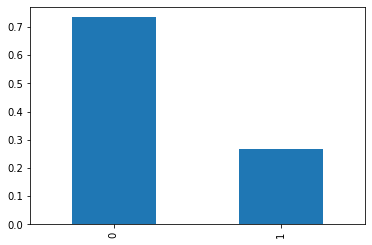

In [7]:
df['churn'].value_counts(normalize=True).plot.bar()
plt.show()

#about 25% churn

In [8]:
df=df.sample(frac=1, random_state=3)
y = df['churn']
X = df.drop('churn', axis=1)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

### Ada Boost Classifier

In [11]:
from sklearn.ensemble import AdaBoostClassifier

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve

Confusion matrix - train dataset: 
 [[3235  356]
 [ 575  756]]
Overall accuracy of model - train dataset: 0.8108492482730597
AUC Score - train dataset: 0.8626860790845132


Confusion matrix - test dataset: 
 [[1412  160]
 [ 245  293]]
Overall accuracy of model - test dataset: 0.8080568720379147
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1572
           1       0.65      0.54      0.59       538

    accuracy                           0.81      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110

AUC Score - test dataset: 0.8384466311000124


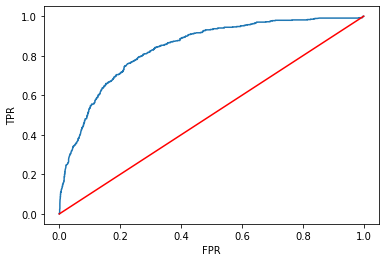

In [13]:
ada  = AdaBoostClassifier(random_state=3)

ada.fit(X_train, y_train)

y_train_pred = ada.predict(X_train)
y_train_prob = ada.predict_proba(X_train)[:,1]

print('Confusion matrix - train dataset:', '\n', confusion_matrix(y_train, y_train_pred))
print('Overall accuracy of model - train dataset:', accuracy_score(y_train, y_train_pred))
print('AUC Score - train dataset:', roc_auc_score(y_train, y_train_prob))

print('\n')

y_test_pred = ada.predict(X_test)
y_test_prob = ada.predict_proba(X_test)[:,1]

print('Confusion matrix - test dataset:', '\n', confusion_matrix(y_test, y_test_pred))
print('Overall accuracy of model - test dataset:', accuracy_score(y_test, y_test_pred))
print('Classification Report - Test : ', '\n', classification_report(y_test, y_test_pred)) 
print('AUC Score - test dataset:', roc_auc_score(y_test, y_test_prob))

fpr,tpr,thresholds = roc_curve(y_test, y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

### LightGBM Classifier

In [19]:
import lightgbm as lgb

In [20]:
lgbm = lgb.LGBMClassifier()

In [21]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

In [28]:
params = {'n_estimators' : sp_randint(50,200),
         'max_depth' : sp_randint(2,15),
         'learning_rate' : sp_uniform(0.001, 0.5), #default is 0.1
         'num_leaves' : sp_randint(20,50)} #default is 31

rsearch = RandomizedSearchCV(lgbm, param_distributions=params, cv=3, n_iter=200,\
                  n_jobs=-1, random_state=3)

rsearch.fit(X,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lambda=0.0, sile...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002B2C747A0C

In [29]:
rsearch.best_params_

{'learning_rate': 0.16390357903243724,
 'max_depth': 2,
 'n_estimators': 59,
 'num_leaves': 21}

Confusion matrix - train dataset: 
 [[3266  325]
 [ 581  750]]
Overall accuracy of model - train dataset: 0.8159284843559529
AUC Score - train dataset: 0.863984194562707


Confusion matrix - test dataset: 
 [[1415  157]
 [ 252  286]]
Overall accuracy of model - test dataset: 0.8061611374407583


Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1572
           1       0.65      0.53      0.58       538

    accuracy                           0.81      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110

AUC Score - test dataset: 0.8455599619739494


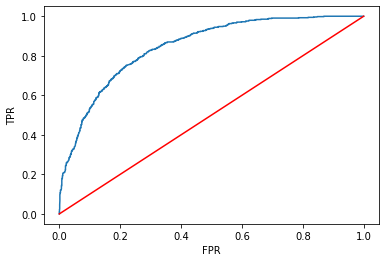

In [31]:
lgbm = lgb.LGBMClassifier(**rsearch.best_params_)

lgbm.fit(X_train, y_train) 

y_train_pred = lgbm.predict(X_train)
y_train_prob = lgbm.predict_proba(X_train)[:,1]

print('Confusion matrix - train dataset:', '\n', confusion_matrix(y_train, y_train_pred))
print('Overall accuracy of model - train dataset:', accuracy_score(y_train, y_train_pred))
print('AUC Score - train dataset:', roc_auc_score(y_train, y_train_prob))

print('\n')

y_test_pred = lgbm.predict(X_test)
y_test_prob = lgbm.predict_proba(X_test)[:,1]

print('Confusion matrix - test dataset:', '\n', confusion_matrix(y_test, y_test_pred))
print('Overall accuracy of model - test dataset:', accuracy_score(y_test, y_test_pred))
print('\n')
print('Classification Report - Test : ', '\n', classification_report(y_test, y_test_pred)) 
#wherevere, prediction of positives are critical print classification report
print('AUC Score - test dataset:', roc_auc_score(y_test, y_test_prob))

fpr,tpr,thresholds = roc_curve(y_test, y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
#lower the learning rate - costly in running
#higher learning rate - might miss